## Ridge回归

### 一.手写模型完成Ridge回归

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [3]:
# 读取数据
data = np.genfromtxt('example.dat', delimiter = ',')
# 选择特征与标签
x = data[:,0:100] 
y = data[:,100].reshape(-1,1)

# 加一列
X = np.column_stack((np.ones((x.shape[0],1)),x))

# 划分训练集与测试集
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 101) (70, 1) (31, 101) (31, 1)


In [4]:
# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [5]:
# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*(np.sum(np.square(w)))
    dw = np.dot(X.T, (y_hat-y)) /num_train + 2*alpha*w
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [6]:
# 定义训练过程
def ridge_train(X, y, learning_rate=0.01, epochs=300):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

In [7]:
# 执行训练示例
loss, loss_list, params, grads = ridge_train(X_train, y_train, 0.01, 1000)

# 查看训练参数，参数很多
print(params)

epoch 100 loss 1.272892
epoch 200 loss 0.918566
epoch 300 loss 0.824857
epoch 400 loss 0.786619
epoch 500 loss 0.767618
epoch 600 loss 0.757040
epoch 700 loss 0.750696
epoch 800 loss 0.746687
epoch 900 loss 0.744053
{'w': array([[-0.04196546],
       [-0.10129988],
       [ 0.39150459],
       [ 0.27116379],
       [ 0.14453605],
       [ 0.64205522],
       [-0.11777636],
       [ 0.63100371],
       [-0.24612371],
       [-0.01809963],
       [-0.0098817 ],
       [ 0.59860774],
       [ 0.05109339],
       [ 0.57323775],
       [ 0.0717013 ],
       [-0.2494207 ],
       [ 0.05841939],
       [ 0.34882372],
       [-0.05196151],
       [ 0.59741259],
       [ 0.07360193],
       [-0.00804983],
       [-0.08417487],
       [ 0.38967928],
       [-0.02238394],
       [-0.05105738],
       [-0.04475576],
       [-0.04810095],
       [-0.05424062],
       [ 0.36298941],
       [ 0.09421072],
       [ 0.12947524],
       [ 0.12975187],
       [ 0.13770473],
       [-0.11610581],
       [

In [8]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    y_pred = np.dot(X, w) + b
    return y_pred

In [9]:
# 预测
y_pred = predict(X_test, params)
print(y_pred[:5])   # 查看前5个预测的结果
print(y_test[:5])   # 查看前5个真实的结果

[[-0.07363409]
 [-2.23904964]
 [ 1.35392332]
 [-2.21912506]
 [-2.56515114]]
[[ 0.24671]
 [-4.25711]
 [ 2.38642]
 [-1.87815]
 [-3.41362]]


In [10]:
# 使用sklearn计算得分
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-0.6338800998887395

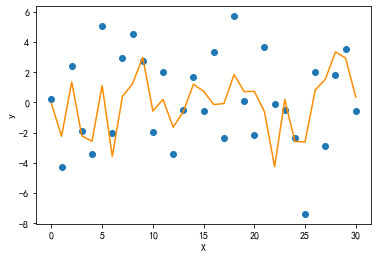

In [11]:
# 简单绘图
# 散点图：真实值
# 折线图：预测值
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

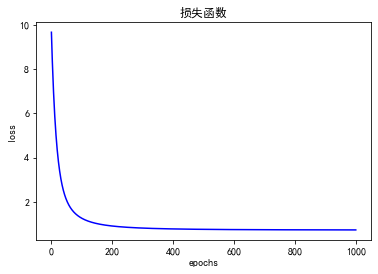

In [12]:
# 训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("损失函数")
plt.show()

### 二.使用sklearn完成模型

In [13]:
from sklearn import linear_model        # 导入线性模型模块
sk_lasso = linear_model.Lasso(alpha=0.1) # 创建lasso模型实例
sk_lasso.fit(X_train, y_train)           # 对训练集进行拟合
# 打印模型相关系数
print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)

sklearn Lasso intercept : [-0.23824815]

sklearn Lasso coefficients :
 [ 0.         -0.          0.59804516  0.64230683  0.          1.0070841
 -0.          0.81815409 -0.22756851  0.          0.          0.793601
  0.          0.74108335 -0.         -0.1250168  -0.          0.79407074
  0.          0.81867433  0.          0.         -0.          0.56664364
 -0.         -0.         -0.         -0.         -0.          0.49526526
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.0078254   0.          0.         -0.
 -0.          0.01986066  0.         -0.          0.         -0.
  0.         -0.06797763  0.24581414  0.         -0.04180909 -0.
  0.10542471  0.03156005  0.          0.          0.         -0.
 -0.          0.         -0.          0.12548825  0.2340209  -0.
  0.          0.16875552  0.          0.01596168  0.         -0.
  0.          0.         -0.          0.2005080